#### I have around 530 netCDF files in a directory, which is essentially monthly data on sea ice ranging from November-1978 to December-2022. I want to plot a time series plot where the y-axis will be cdr_seaice_conc_monthly values of a particular latitude and longitude and the x-axis will be the time.

#### Therefore, I decided to read time,xgrid, ygrid, cdr_seaice_conc_monthly variables from all the neCDF files using the following code:


In [1]:
import os
import pandas as pd
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Directory containing the NetCDF files
directory = r'E:\Southern Hemisphere'

# List all NetCDF files in the directory
file_names = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.nc')]

# Variables to read
variables = ['time', 'xgrid', 'ygrid', 'cdr_seaice_conc_monthly']

# Create an empty list to store the data arrays
data_arrays = list()

# Loop through the files
for file_name in file_names:
    # Read the file
    ds = xr.open_dataset(file_name)[variables]
    df = ds.to_dataframe().assign(filename=Path(file_name).stem)
    data_arrays.append(df)

#### I then concatenate all the dataframes into a single dataframe and got an overview of the data. However, I noticed that rather than showing traditional North, South, East, West coordinates, the latitude and longtidues were given in xgrid and ygrid values.

In [3]:
df = pd.concat(data_arrays)
df

time      xgrid      ygrid  cdr_seaice_conc_monthly  \
tdim x   y                                                               
0    0   0   1978-11-01 -3937500.0  4337500.0                      0.0   
         1   1978-11-01 -3937500.0  4312500.0                      0.0   
         2   1978-11-01 -3937500.0  4287500.0                      0.0   
         3   1978-11-01 -3937500.0  4262500.0                      0.0   
         4   1978-11-01 -3937500.0  4237500.0                      0.0   
...                 ...        ...        ...                      ...   
     315 327 2022-12-01  3937500.0 -3837500.0                      0.0   
         328 2022-12-01  3937500.0 -3862500.0                      0.0   
         329 2022-12-01  3937500.0 -3887500.0                      0.0   
         330 2022-12-01  3937500.0 -3912500.0                      0.0   
         331 2022-12-01  3937500.0 -3937500.0                      0.0   

                                              filename  
tdim x   y                                              
0    0   0    seaice_conc_monthly_sh_197811_n07_v04r00  
         1    seaice_conc_monthly_sh_197811_n07_v04r00  
         2    seaice_conc_monthly_sh_197811_n07_v04r00  
         3    seaice_conc_monthly_sh_197811_n07_v04r00  
         4    seaice_conc_monthly_sh_197811_n07_v04r00  
...                                                ...  
     315 327  seaice_conc_monthly_sh_202212_f17_v04r00  
         328  seaice_conc_monthly_sh_202212_f17_v04r00  
         329  seaice_conc_monthly_sh_202212_f17_v04r00  
         330  seaice_conc_monthly_sh_202212_f17_v04r00  
         331  seaice_conc_monthly_sh_202212_f17_v04r00  

[55603360 rows x 5 columns]

#### One of my main objective is to visualize the sea ice conditions of specific locations surroundng the antarctica. Therefore, I fixed a latitude and longitude range of -80 to -70 and -135 to -180. But that is likely to give no output since lat long are in different format.

AttributeError: Line2D.set() got an unexpected keyword argument 's'

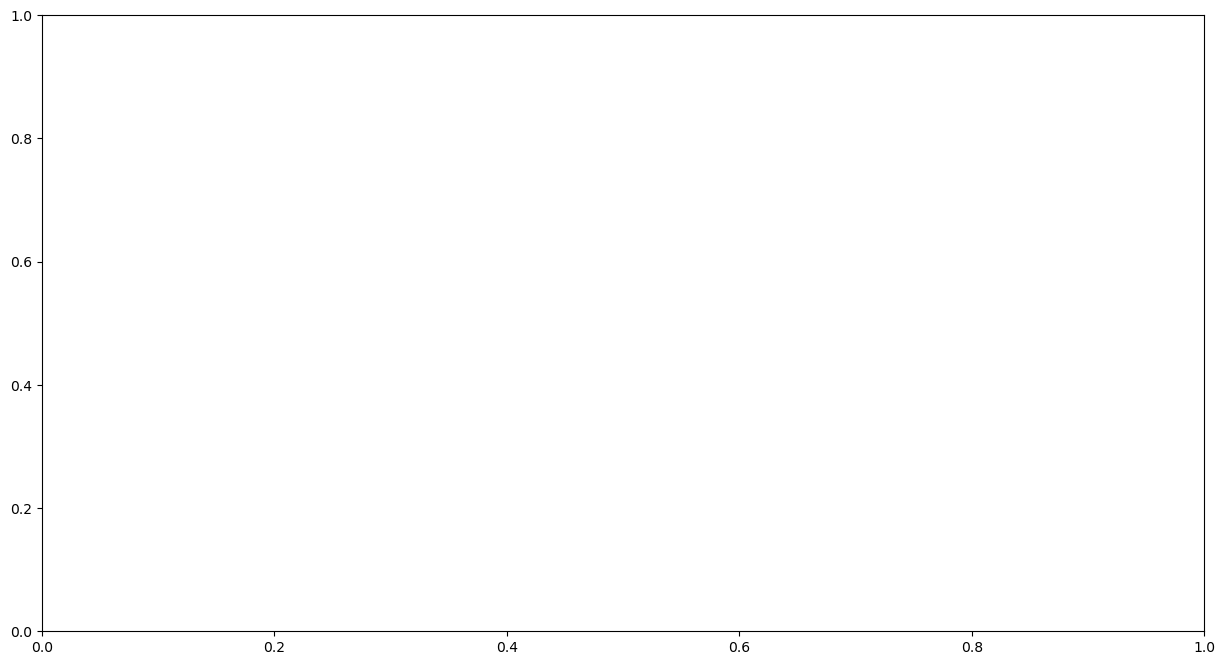

In [14]:
import matplotlib.pyplot as plt

# Specify the latitude and longitude range for the Weddell Sea
latitude_range = (-80, -70)
longitude_range = (-135, -180)

# Filter the DataFrame based on the latitude and longitude range
filtered_df = df[
    (df['xgrid'] >= longitude_range[0]) & (df['xgrid'] <= longitude_range[1]) &
    (df['ygrid'] >= latitude_range[0]) & (df['ygrid'] <= latitude_range[1])
]

# Extract the time and sea ice concentration data
time = filtered_df['time']
seaice_conc = filtered_df['cdr_seaice_conc_monthly']

ax = filtered_df.plot(kind='line', x='time', y='cdr_seaice_conc_monthly', s=1,figsize=(15, 8))

In [4]:
df['cdr_seaice_conc_monthly'].max()

2.5399999618530273

#### The following list of y value shows how grids are arranged in this nc file

In [5]:
import xarray as xr

Combined_data = xr.open_mfdataset('E:/Southern Hemisphere/*.nc', concat_dim='tdim', combine='nested')

In [20]:
# list values of xgrid
print(Combined_data.ygrid.values)

[ 4337500.  4312500.  4287500.  4262500.  4237500.  4212500.  4187500.
  4162500.  4137500.  4112500.  4087500.  4062500.  4037500.  4012500.
  3987500.  3962500.  3937500.  3912500.  3887500.  3862500.  3837500.
  3812500.  3787500.  3762500.  3737500.  3712500.  3687500.  3662500.
  3637500.  3612500.  3587500.  3562500.  3537500.  3512500.  3487500.
  3462500.  3437500.  3412500.  3387500.  3362500.  3337500.  3312500.
  3287500.  3262500.  3237500.  3212500.  3187500.  3162500.  3137500.
  3112500.  3087500.  3062500.  3037500.  3012500.  2987500.  2962500.
  2937500.  2912500.  2887500.  2862500.  2837500.  2812500.  2787500.
  2762500.  2737500.  2712500.  2687500.  2662500.  2637500.  2612500.
  2587500.  2562500.  2537500.  2512500.  2487500.  2462500.  2437500.
  2412500.  2387500.  2362500.  2337500.  2312500.  2287500.  2262500.
  2237500.  2212500.  2187500.  2162500.  2137500.  2112500.  2087500.
  2062500.  2037500.  2012500.  1987500.  1962500.  1937500.  1912500.
  1887

#### I tried to assign lat lon to the xgid, ygrid but did not work

In [6]:
import matplotlib.pyplot as plt

latitude =(-80, -70)
longitude = (-135, -180)

data_at_location = Combined_data.sel(ygrid=latitude, xgrid=longitude, method='nearest')

time = data_at_location['time']
seaice_conc = data_at_location['cdr_seaice_conc_monthly']

plt.plot(time, seaice_conc)
plt.xlabel('Time')
plt.ylabel('Sea Ice Concentration')
plt.title(f'Time Series of Sea Ice Concentration at Latitude {latitude} and Longitude {longitude}')
plt.show()

KeyError: "no index found for coordinate 'ygrid'"

#### I assummed there is something wrong with the projection, hence i identified the correct projection for the source which is NSIDC Sea Ice Polar Stereographic South (EPSG: 3412) anc convert it to WGS84. But there was no luck with it.

In [22]:
import pyproj

source_epsg = 3412  # NSIDC Sea Ice Polar Stereographic South
dest_epsg = 4326  # WGS84

lon = pyproj.transform(source_epsg, dest_epsg, Combined_data.xgrid.values, Combined_data.ygrid.values)

C:\Users\ashif\AppData\Local\Temp\ipykernel_20124\4092311789.py:6: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon = pyproj.transform(source_epsg, dest_epsg, Combined_data.xgrid.values, Combined_data.ygrid.values)


ProjError: x, y, z, and time must be same size if included.

#### The following codes provide general information about the data

In [9]:
# read seaice_conc_monthly_sh_202212_f17_v04r00.nc netcdf file

ds = xr.open_dataset('seaice_conc_monthly_sh_202212_f17_v04r00.nc')
ds

<xarray.Dataset>
Dimensions:                           (tdim: 1, y: 332, x: 316)
Coordinates:
    time                              (tdim) datetime64[ns] ...
    xgrid                             (x) float32 ...
    ygrid                             (y) float32 ...
Dimensions without coordinates: tdim, y, x
Data variables:
    cdr_seaice_conc_monthly           (tdim, y, x) float32 ...
    nsidc_bt_seaice_conc_monthly      (tdim, y, x) float32 ...
    nsidc_nt_seaice_conc_monthly      (tdim, y, x) float32 ...
    projection                        |S1 ...
    qa_of_cdr_seaice_conc_monthly     (tdim, y, x) float32 ...
    stdev_of_cdr_seaice_conc_monthly  (tdim, y, x) float32 ...
Attributes: (12/42)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc_monthly
    metadata_link:             https://nsidc.org/data/g02202/versions/4/
    ...                        ...
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2023-02-22T23:18:26Z
    time_coverage_start:       2022-12-01T00:00:00Z
    time_coverage_end:         2022-12-31T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...

In [10]:
# show the variables of ds
ds.variables

Frozen({'cdr_seaice_conc_monthly': <xarray.Variable (tdim: 1, y: 332, x: 316)>
[104912 values with dtype=float32]
Attributes:
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    standard_name:        sea_ice_area_fraction
    units:                1
    flag_values:          [251 252 253 254 255]
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    grid_mapping:         projection
    reference:            https://nsidc.org/data/g02202/versions/4/
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    valid_range:          [  0 100], 'nsidc_bt_seaice_conc_monthly': <xarray.Variable (tdim: 1, y: 332, x: 316)>
[104912 values with dtype=float32]
Attributes:
    long_name:      Passive Microwave Monthly Southern Hemisphere Sea Ice Con...
    standard_name:  sea_ice_area_fraction
    units:          1
    flag_values:    [251 252 253 254 255]
   

#### The following are the examples of some of the plots that I am willing to get. For example, sea ice concentration of Ross Sea from November-1978 to December-2022. If possible, I would be happy to see the seasonal trend of same location in different years

<img src="trend.png">

<img src="seasonal.png">

#### Finally I am providing the original links of the dataset

SyntaxError: invalid syntax (Temp/ipykernel_6760/4065731860.py, line 1)